<a href="https://colab.research.google.com/github/alexkondrashov7/-hackathon_2025_mipt/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22rostelecom_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data():
    base_path = "/content/drive/My Drive/clean_data/"

    customers = pd.read_csv(base_path + "customers.csv")
    geolocation = pd.read_csv(base_path + "geolocation.csv")
    order_pay = pd.read_csv(base_path + "order_payments.csv")
    reviews = pd.read_csv(base_path + "order_reviews.csv")
    orders = pd.read_csv(base_path + "orders.csv")
    item = pd.read_csv(base_path + "orders_items.csv")
    category_name = pd.read_csv(base_path + "product_category_name_translation.csv")
    products = pd.read_csv(base_path + "products.csv")
    sellers = pd.read_csv(base_path + "sellers.csv")

    return customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers

In [ ]:
# Объединение данных
def merge_data(orders, item, order_pay, reviews, products, customers, sellers, category_name):
    df = orders.merge(item, on='order_id', how='left')
    df = df.merge(order_pay, on='order_id', how='outer', validate='m:m')
    df = df.merge(reviews, on='order_id', how='outer')
    df = df.merge(products, on='product_id', how='outer')
    df = df.merge(customers, on='customer_id', how='outer')
    df = df.merge(sellers, on='seller_id', how='outer')
    df = df.merge(category_name, on="product_category_name", how="left")
    return df

In [ ]:
# Очистка данных: удаление строк без customer_unique_id
def filter_customers(df):
    return df[~df["customer_unique_id"].isna()]

In [ ]:
# Главная функция пайплайна
def main_pipeline():
    # Шаг 1: Загрузка данных
    customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers = load_data()

    # Шаг 2: Объединение данных
    df = merge_data(orders, item, order_pay, reviews, products,
                    customers, sellers, category_name)

    # Шаг 3: Фильтрация данных
    df = filter_customers(df)

    final_data = df

    return final_data

In [ ]:
data = main_pipeline()

In [ ]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,3c7e305796add66698959fc7ad176f6b,87502.0,umuarama,PR,9080.0,santo andre,SP,small_appliances
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9de5797cddb92598755a0f76383ddbbb,35490.0,entre rios de minas,MG,9080.0,santo andre,SP,small_appliances
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9915eb9f74b6c11aaf04833f65b00e93,38600.0,paracatu,MG,9080.0,santo andre,SP,small_appliances
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118686 entries, 0 to 118810
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115706 non-null  object 
 1   customer_id                    118686 non-null  object 
 2   order_status                   115706 non-null  object 
 3   order_purchase_timestamp       115706 non-null  object 
 4   order_approved_at              115706 non-null  object 
 5   order_delivered_carrier_date   115706 non-null  object 
 6   order_delivered_customer_date  115706 non-null  object 
 7   order_estimated_delivery_date  115706 non-null  object 
 8   order_item_id                  115706 non-null  float64
 9   product_id                     115706 non-null  object 
 10  seller_id                      115706 non-null  object 
 11  shipping_limit_date            115706 non-null  object 
 12  price                          1157

In [ ]:
data.isna().sum()

,0
order_id,2980
customer_id,0
order_status,2980
order_purchase_timestamp,2980
order_approved_at,2980
order_delivered_carrier_date,2980
order_delivered_customer_date,2980
order_estimated_delivery_date,2980
order_item_id,2980
product_id,2980


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(113193, 38)

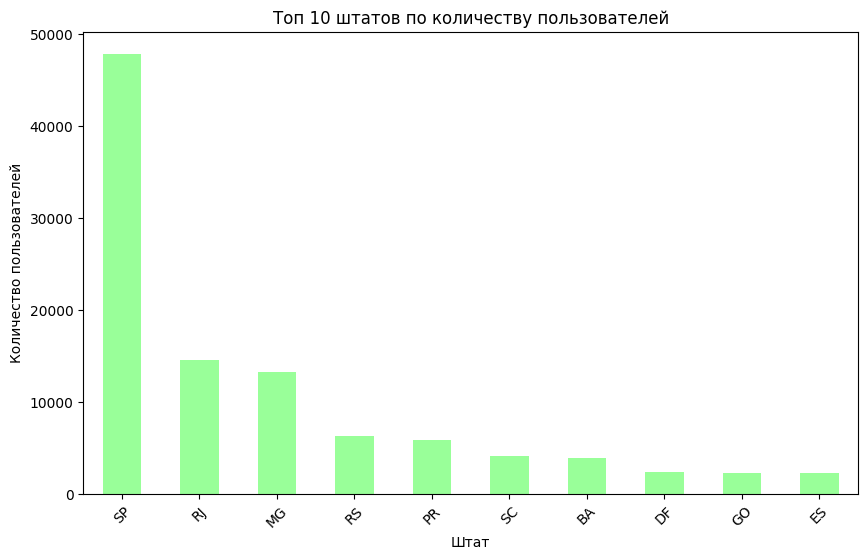

In [ ]:
#количество пользователей по штатам
user_state_counts = data['customer_state'].value_counts().head(10)

plt.figure(figsize=(10, 6))
user_state_counts.plot(kind='bar', color='#99ff99')
plt.title("Топ 10 штатов по количеству пользователей")
plt.xlabel("Штат")
plt.ylabel("Количество пользователей")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#большинство пользователей живут в штате SP

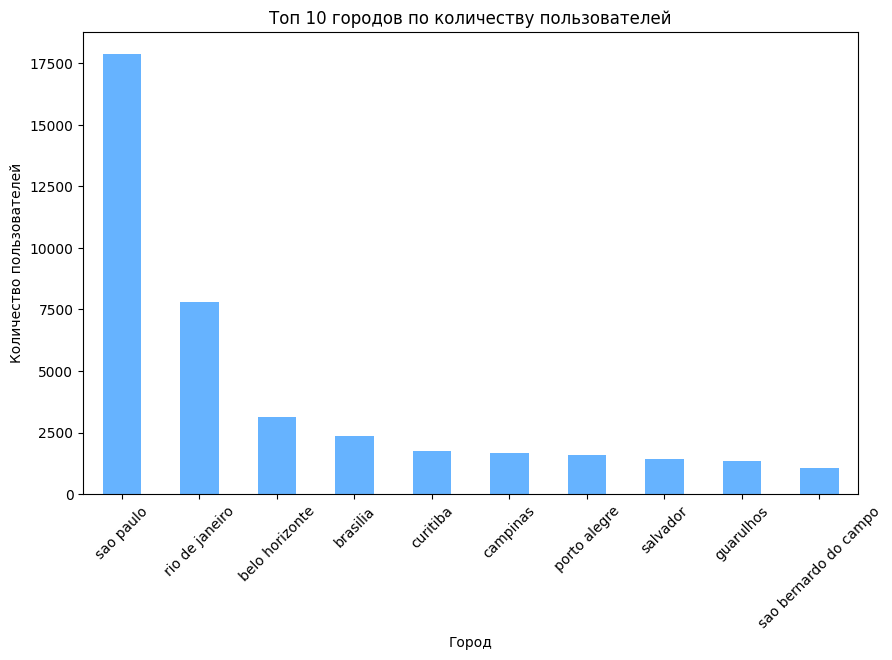

In [ ]:
#распределение пользователей по городам
user_city_counts = data['customer_city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
user_city_counts.plot(kind='bar', color='#66b3ff')
plt.title("Топ 10 городов по количеству пользователей")
plt.xlabel("Город")
plt.ylabel("Количество пользователей")
plt.xticks(rotation=45)
plt.show()

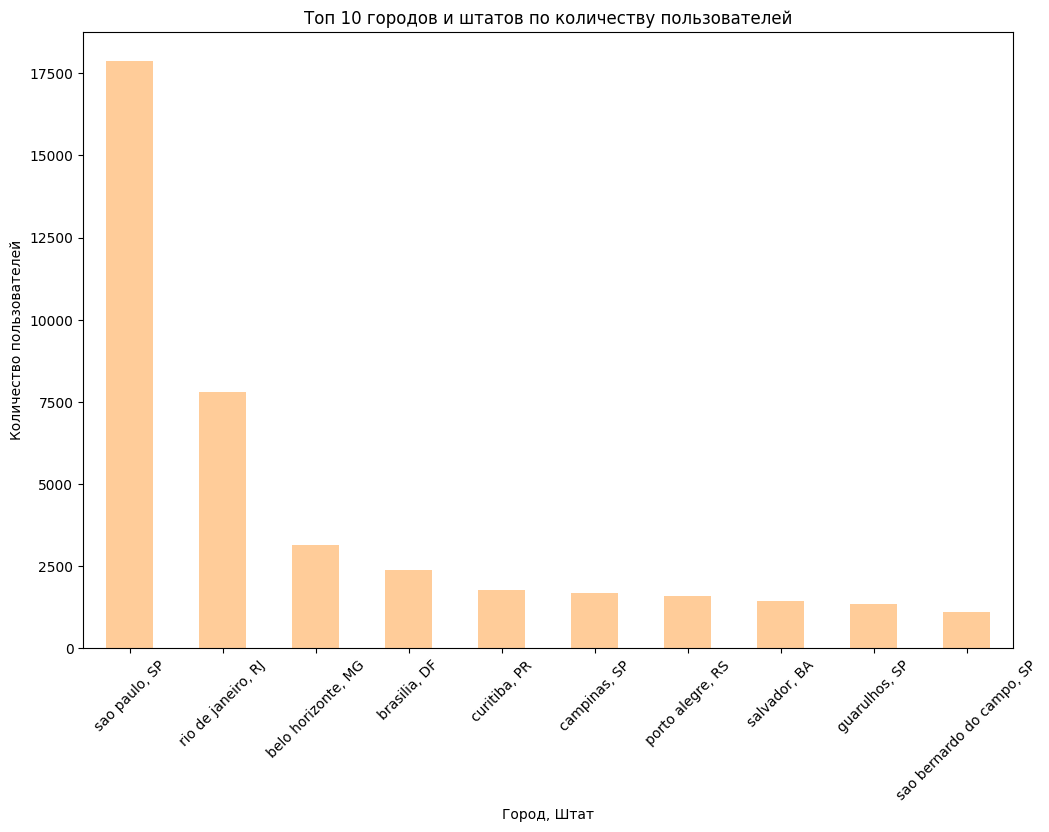

In [ ]:
#количество пользователей по городам и штатам вместе
data['city_state'] = data['customer_city'] + ', ' + data['customer_state']
city_state_counts = data['city_state'].value_counts().head(10)

plt.figure(figsize=(12, 8))
city_state_counts.plot(kind='bar', color='#ffcc99')
plt.title("Топ 10 городов и штатов по количеству пользователей")
plt.xlabel("Город, Штат")
plt.ylabel("Количество пользователей")
plt.xticks(rotation=45)
plt.show()

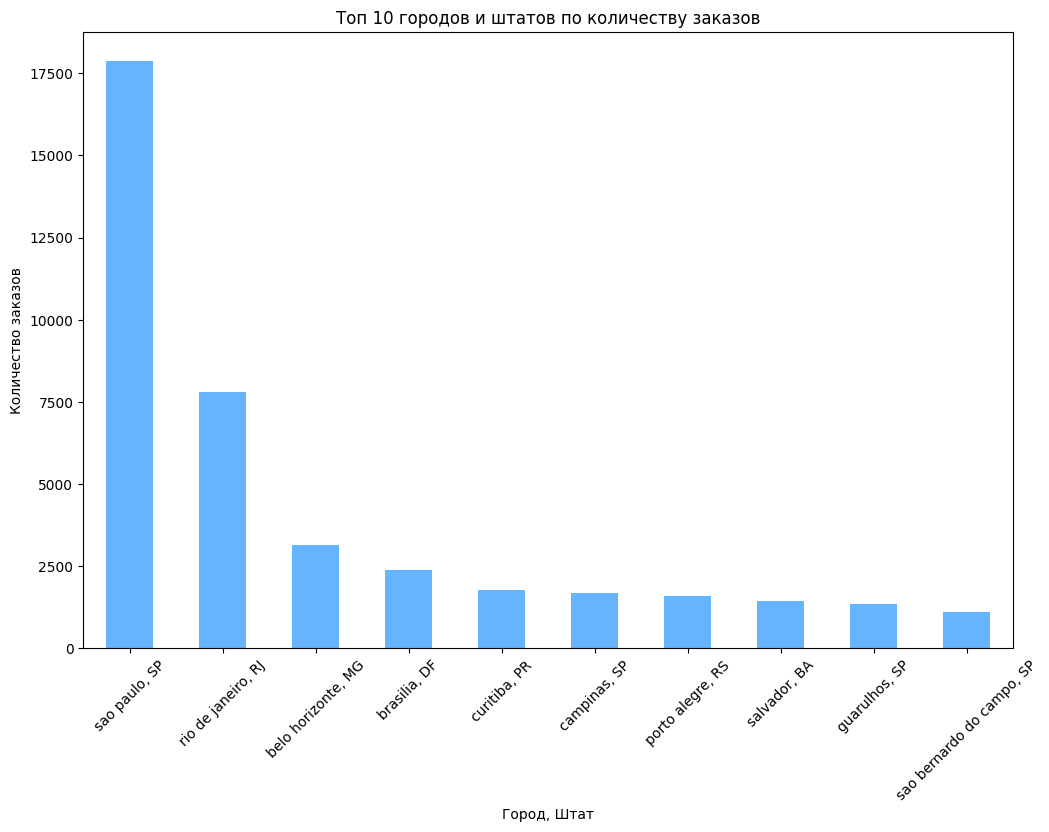

In [ ]:
#количество заказов по городам и штатам
orders_by_city_state = data.groupby('city_state')['order_id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
orders_by_city_state.plot(kind='bar', color='#66b3ff')
plt.title("Топ 10 городов и штатов по количеству заказов")
plt.xlabel("Город, Штат")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.show()

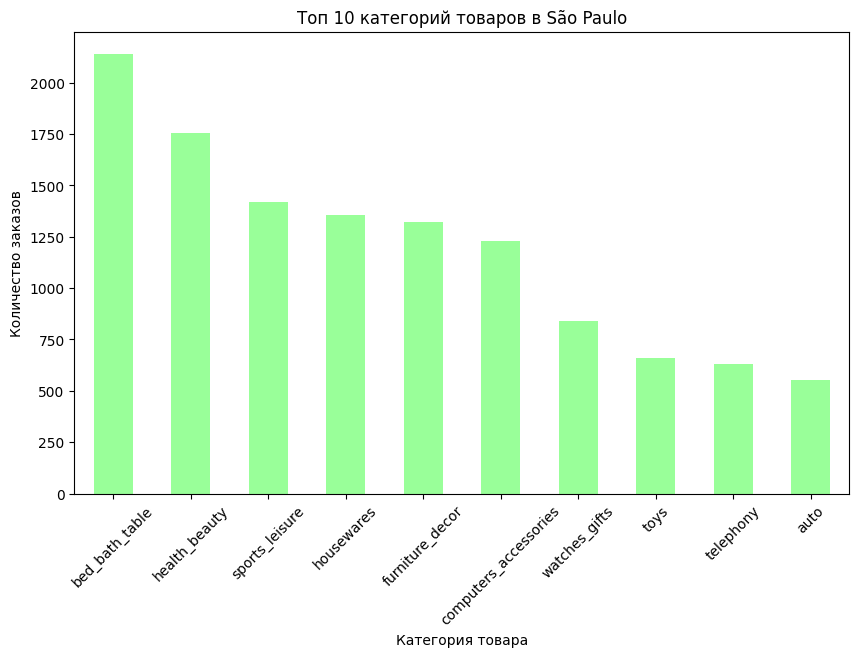

product_category_name_english
bed_bath_table           2142
health_beauty            1757
sports_leisure           1421
housewares               1358
furniture_decor          1324
computers_accessories    1228
watches_gifts             842
toys                      658
telephony                 632
auto                      554
Name: count, dtype: int64


In [ ]:
#какие категории товаров популярны в более крупных городах
sp_orders = data[data['customer_city'] == 'sao paulo']
product_category_sp = sp_orders['product_category_name_english'].value_counts()

top_product_categories_sp = product_category_sp.head(10)

plt.figure(figsize=(10, 6))
top_product_categories_sp.plot(kind='bar', color='#99ff99')
plt.title("Топ 10 категорий товаров в São Paulo")
plt.xlabel("Категория товара")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.show()

print(top_product_categories_sp)

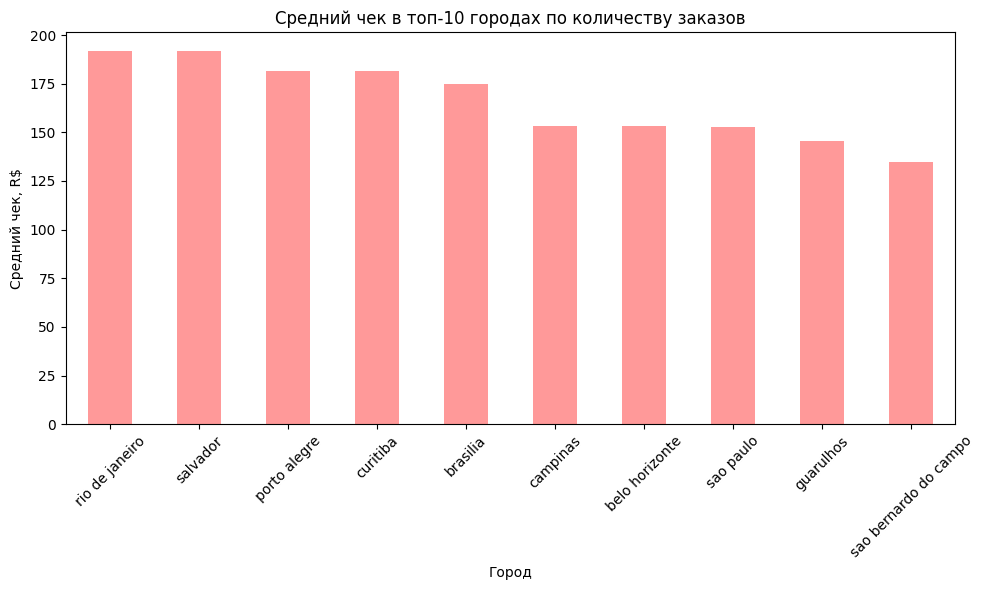

customer_city
rio de janeiro           191.79
salvador                 191.62
porto alegre             181.63
curitiba                 181.62
brasilia                 175.00
campinas                 153.48
belo horizonte           153.45
sao paulo                152.59
guarulhos                145.35
sao bernardo do campo    134.58
Name: payment_value, dtype: float64


In [ ]:
#средний платеж по городам
avg_payment_city = data.groupby('customer_city')['payment_value'].mean()

#топ-10 по заказам
top_10_cities = data['customer_city'].value_counts().head(10).index
avg_payment_top_10 = avg_payment_city[avg_payment_city.index.isin(top_10_cities)].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_payment_top_10.plot(kind='bar', color='#ff9999')
plt.title("Средний чек в топ-10 городах по количеству заказов")
plt.xlabel("Город")
plt.ylabel("Средний чек, R$")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(avg_payment_top_10.round(2))

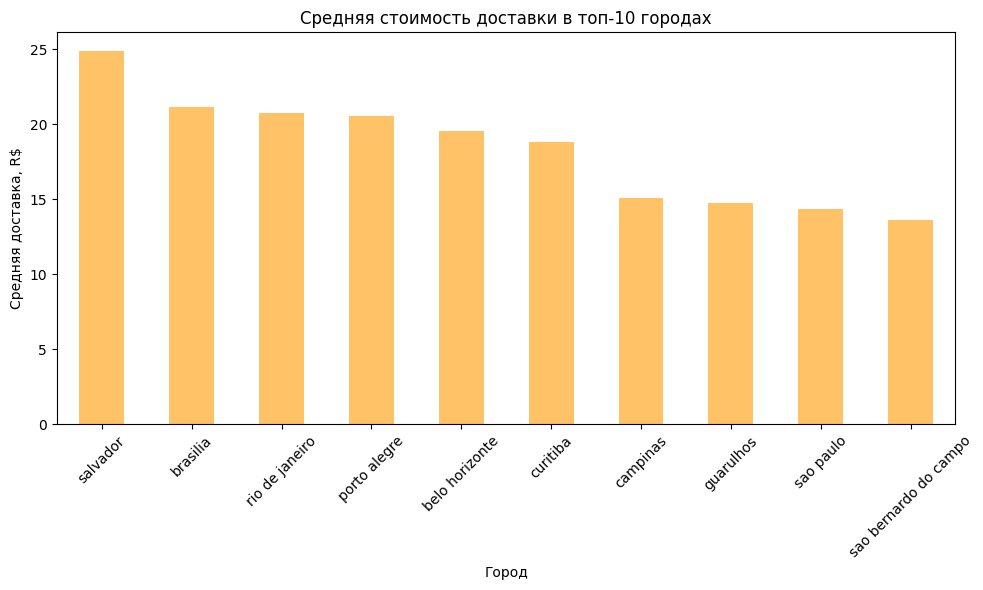

customer_city
salvador                 24.90
brasilia                 21.19
rio de janeiro           20.78
porto alegre             20.59
belo horizonte           19.54
curitiba                 18.84
campinas                 15.12
guarulhos                14.74
sao paulo                14.35
sao bernardo do campo    13.65
Name: freight_value, dtype: float64


In [ ]:
#средняя стоимость доставки по городам
avg_freight_city = data.groupby('customer_city')['freight_value'].mean()

#топ-10 по пользователям
top_10_users_city = data['customer_city'].value_counts().head(10).index
avg_freight_top_10 = avg_freight_city[avg_freight_city.index.isin(top_10_users_city)].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_freight_top_10.plot(kind='bar', color='#ffc266')
plt.title("Средняя стоимость доставки в топ-10 городах")
plt.xlabel("Город")
plt.ylabel("Средняя доставка, R$")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(avg_freight_top_10.round(2))

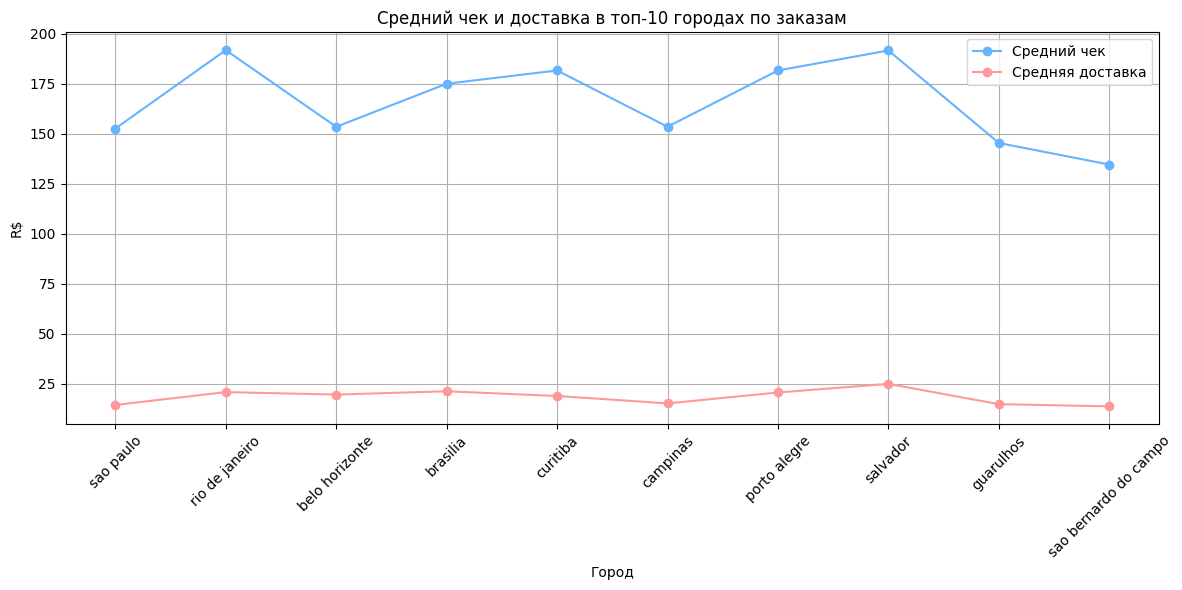

In [ ]:
#сравнение среднего чека и стоимости доставки по городам
city_group = data.groupby("customer_city").agg({
    "payment_value": "mean",
    "freight_value": "mean",
    "order_id": "count"
}).reset_index()

#отбор топ-10 городов по числу заказов
top_cities = city_group.sort_values(by="order_id", ascending=False).head(10)

#график
plt.figure(figsize=(12, 6))
plt.plot(top_cities["customer_city"], top_cities["payment_value"], marker="o", label="Средний чек", color="#66b3ff")
plt.plot(top_cities["customer_city"], top_cities["freight_value"], marker="o", label="Средняя доставка", color="#ff9999")
plt.title("Средний чек и доставка в топ-10 городах по заказам")
plt.xlabel("Город")
plt.ylabel("R$")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

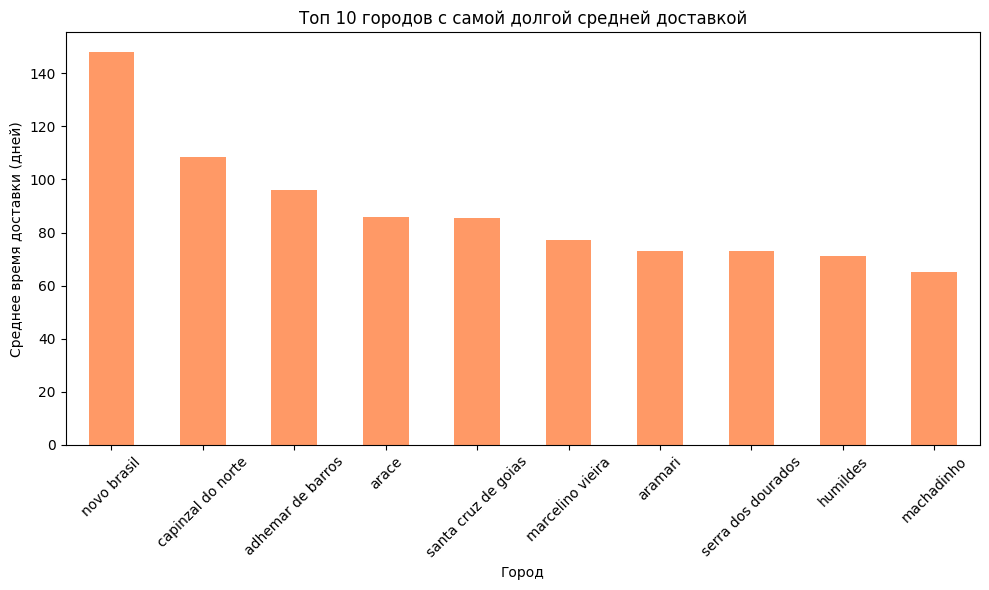

customer_city
novo brasil            148.0
capinzal do norte      108.5
adhemar de barros       96.0
arace                   85.8
santa cruz de goias     85.3
marcelino vieira        77.0
aramari                 73.0
serra dos dourados      73.0
humildes                71.0
machadinho              65.0
Name: delivery_time_days, dtype: float64


In [ ]:
#города с самой долгой доставкой
data['delivery_time_days'] = data['delivery_time'].dt.days

#считаем среднее по городам
delivery_time_by_city = data.groupby('customer_city')['delivery_time_days'].mean().sort_values(ascending=False)

#оставим только топ-10 городов с самой долгой доставкой
top_10_slowest = delivery_time_by_city.head(10)

plt.figure(figsize=(10, 6))
top_10_slowest.plot(kind='bar', color='#ff9966')
plt.title("Топ 10 городов с самой долгой средней доставкой")
plt.xlabel("Город")
plt.ylabel("Среднее время доставки (дней)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(top_10_slowest.round(1))

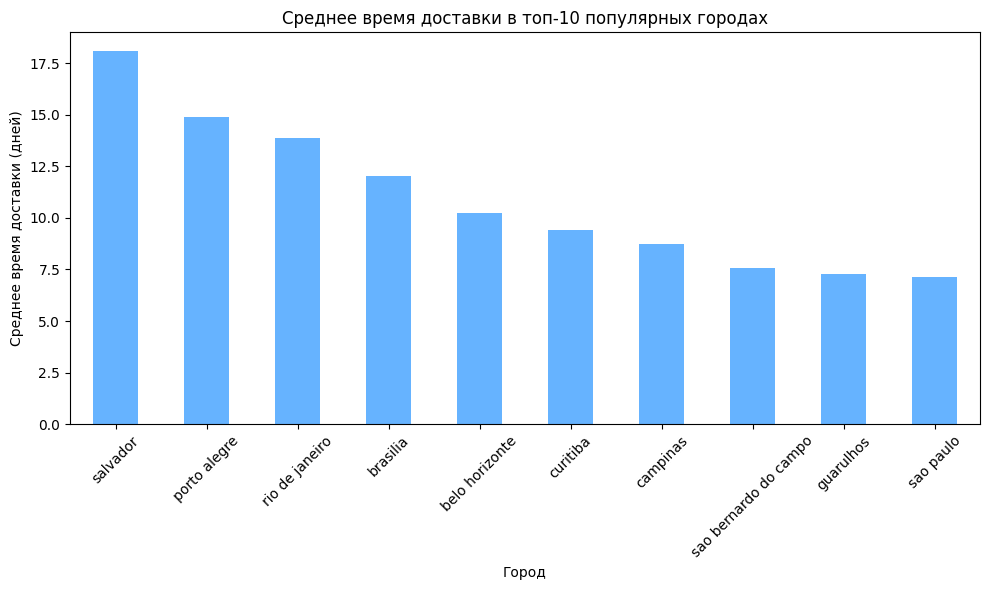

customer_city
salvador                 18.1
porto alegre             14.9
rio de janeiro           13.9
brasilia                 12.1
belo horizonte           10.2
curitiba                  9.4
campinas                  8.7
sao bernardo do campo     7.6
guarulhos                 7.3
sao paulo                 7.1
Name: delivery_time_days, dtype: float64


In [ ]:
#среднее время доставки в самых популярных городах
top_cities = data['customer_city'].value_counts().head(10).index

#фильтруем по этим городам
filtered = data[data['customer_city'].isin(top_cities)]

#средняя доставка по этим городам
avg_delivery_top = filtered.groupby('customer_city')['delivery_time_days'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_delivery_top.plot(kind='bar', color='#66b3ff')
plt.title("Среднее время доставки в топ-10 популярных городах")
plt.xlabel("Город")
plt.ylabel("Среднее время доставки (дней)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(avg_delivery_top.round(1))

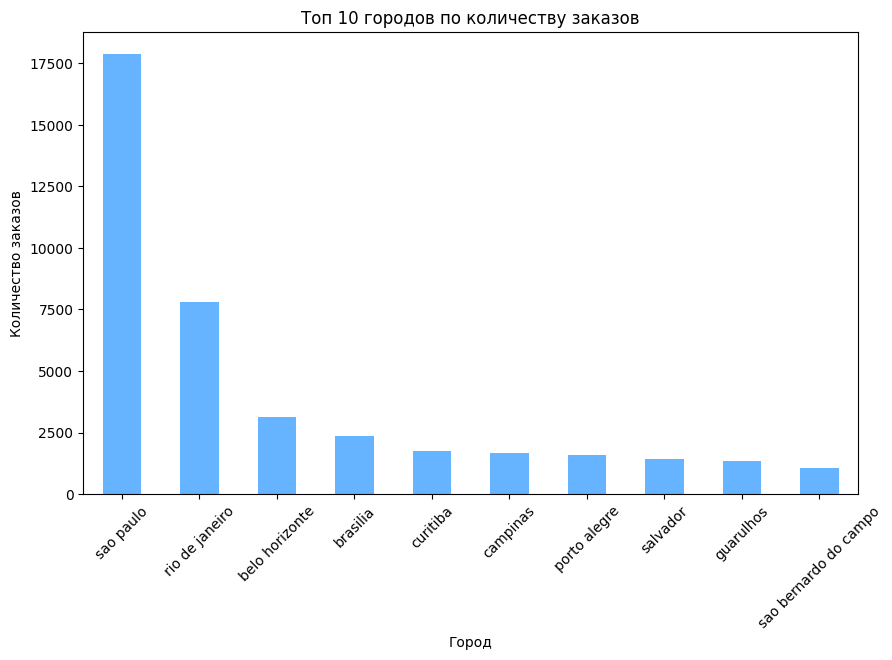

customer_city
sao paulo                17871
rio de janeiro            7785
belo horizonte            3140
brasilia                  2382
curitiba                  1767
campinas                  1678
porto alegre              1593
salvador                  1426
guarulhos                 1335
sao bernardo do campo     1080
Name: count, dtype: int64


In [ ]:
#пользователи из крупных городов совершают больше покупок
orders_by_city = data['customer_city'].value_counts()

top_cities = orders_by_city.head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='#66b3ff')
plt.title("Топ 10 городов по количеству заказов")
plt.xlabel("Город")
plt.ylabel("Количество заказов")
plt.xticks(rotation=45)
plt.show()

print(top_cities)

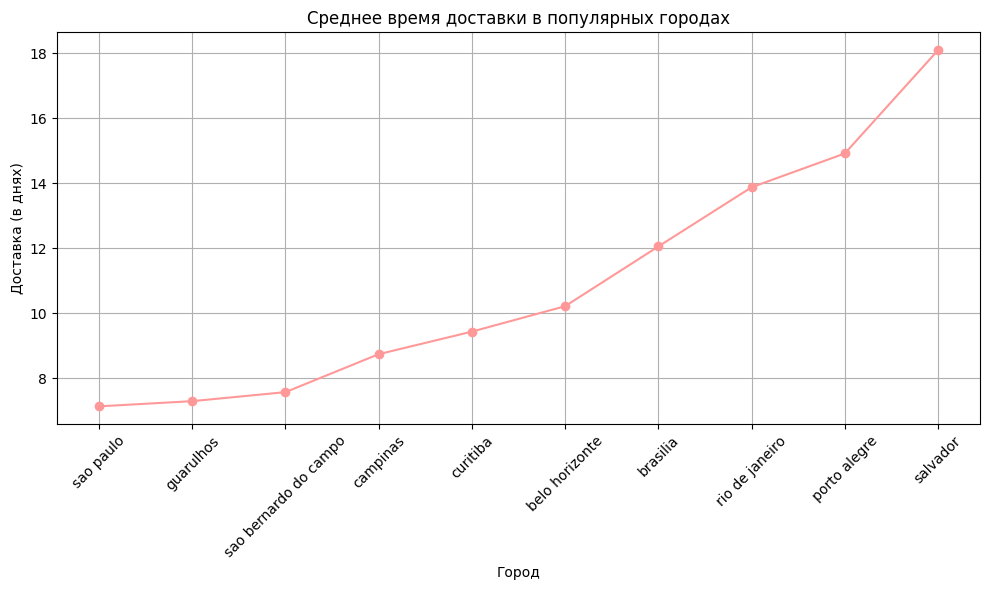

In [ ]:
#среднее время доставки в популярных городах
top_cities = data['customer_city'].value_counts().head(10).index
subset = data[data['customer_city'].isin(top_cities)]

#агрегируем
avg_delivery = subset.groupby("customer_city")["delivery_time_days"].mean().sort_values()

#линейный график
plt.figure(figsize=(10, 6))
plt.plot(avg_delivery.index, avg_delivery.values, marker='o', color="#ff9999")
plt.title("Среднее время доставки в популярных городах")
plt.xlabel("Город")
plt.ylabel("Доставка (в днях)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

city_group
Large City    1.213623
Other City    1.193724
Name: order_id, dtype: float64


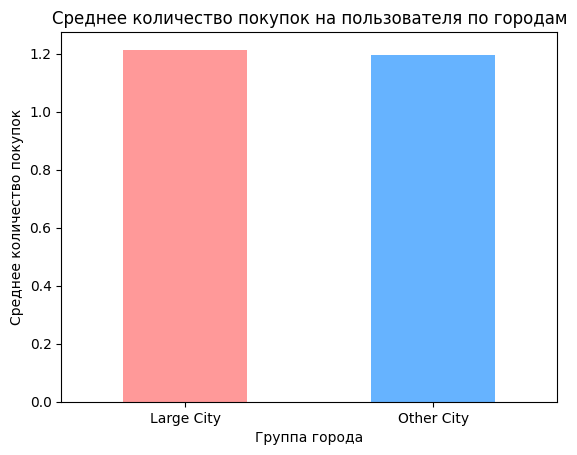

In [ ]:
#жители крупных городов совершают покупки чаще?
large_cities = ['sao paulo', 'rio de janeiro']

data['city_group'] = data['customer_city'].apply(lambda x: 'Large City' if x in large_cities else 'Other City')

user_order_count = data.groupby('customer_id')['order_id'].count()

user_order_count = user_order_count.to_frame().reset_index()
user_order_count = user_order_count.merge(data[['customer_id', 'city_group']].drop_duplicates(), on='customer_id')

avg_orders_by_city_group = user_order_count.groupby('city_group')['order_id'].mean()

print(avg_orders_by_city_group)

avg_orders_by_city_group.plot(kind='bar', color=['#ff9999', '#66b3ff'])
plt.title('Среднее количество покупок на пользователя по городам')
plt.xlabel('Группа города')
plt.ylabel('Среднее количество покупок')
plt.xticks(rotation=0)
plt.show()

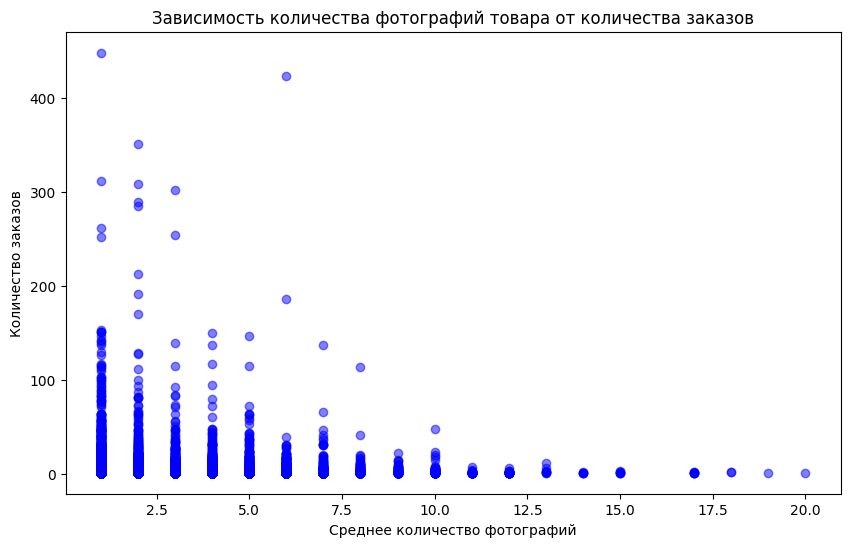

Корреляция между количеством фотографий и количеством заказов: 0.009723859445886449


In [ ]:
#зависимость количества фотографий товара от количества заказов
product_order_count = data.groupby('product_id')['order_id'].nunique()

product_photos_count = data.groupby('product_id')['product_photos_qty'].mean()

product_data = pd.DataFrame({
    'order_count': product_order_count,
    'avg_photos_count': product_photos_count
})

plt.figure(figsize=(10, 6))
plt.scatter(product_data['avg_photos_count'], product_data['order_count'], alpha=0.5, color='blue')
plt.title('Зависимость количества фотографий товара от количества заказов')
plt.xlabel('Среднее количество фотографий')
plt.ylabel('Количество заказов')
plt.show()

correlation = product_data['avg_photos_count'].corr(product_data['order_count'])
print(f'Корреляция между количеством фотографий и количеством заказов: {correlation}')

Топ 10 категорий товаров по количеству заказов:
product_category_name_english
bed_bath_table           9176
health_beauty            8602
sports_leisure           7484
computers_accessories    6498
furniture_decor          6256
housewares               5709
watches_gifts            5452
telephony                4068
auto                     3791
toys                     3774
Name: order_id, dtype: int64


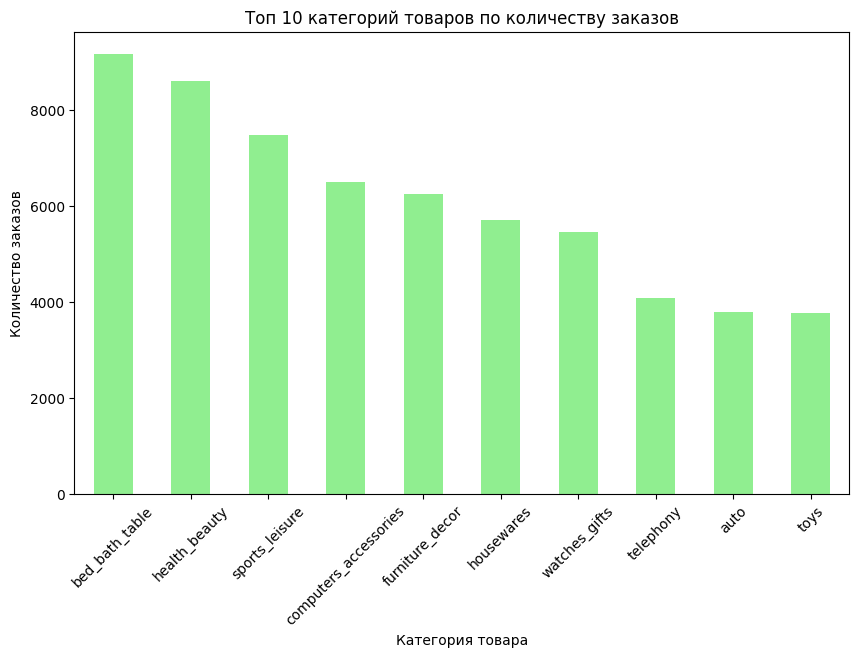

In [ ]:
#топ категорий товаров по количеству заказов
category_order_count = data.groupby('product_category_name_english')['order_id'].nunique()

top_categories = category_order_count.sort_values(ascending=False).head(10)

print("Топ 10 категорий товаров по количеству заказов:")
print(top_categories)

top_categories.plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Топ 10 категорий товаров по количеству заказов')
plt.xlabel('Категория товара')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#отзывы
users_with_reviews = data[data['order_status'] == 'delivered']['customer_id'].unique()

orders_with_reviews = data[data['customer_id'].isin(users_with_reviews)]
orders_no_reviews = data[~data['customer_id'].isin(users_with_reviews)]

orders_with_reviews_count = orders_with_reviews.groupby('customer_id')['order_id'].count()
orders_no_reviews_count = orders_no_reviews.groupby('customer_id')['order_id'].count()

avg_orders_with_reviews = orders_with_reviews_count.mean()
avg_orders_no_reviews = orders_no_reviews_count.mean()

print(f'Среднее количество заказов у пользователей, оставивших отзывы: {avg_orders_with_reviews}')
print(f'Среднее количество заказов у пользователей, не оставивших отзывы: {avg_orders_no_reviews}')

Среднее количество заказов у пользователей, оставивших отзывы: 1.1981792198168635
Среднее количество заказов у пользователей, не оставивших отзывы: 1.1666666666666667


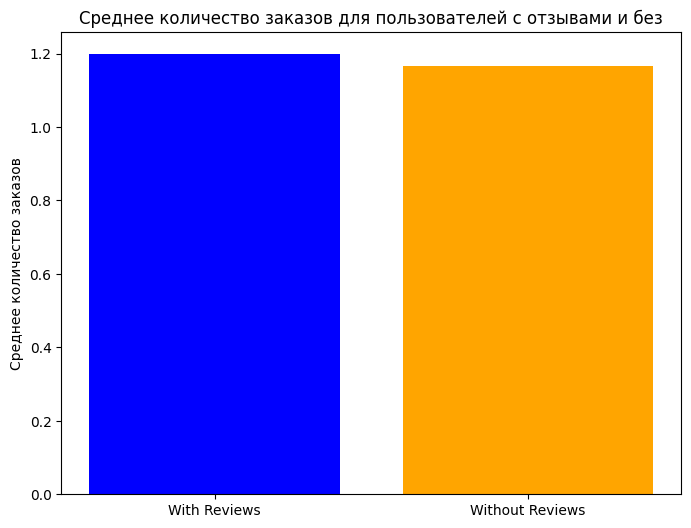

In [ ]:
#cреднее количество заказов для пользователей с отзывами и без
plt.figure(figsize=(8, 6))
plt.bar(['With Reviews', 'Without Reviews'], [avg_orders_with_reviews, avg_orders_no_reviews], color=['blue', 'orange'])
plt.title('Среднее количество заказов для пользователей с отзывами и без')
plt.ylabel('Среднее количество заказов')
plt.show()

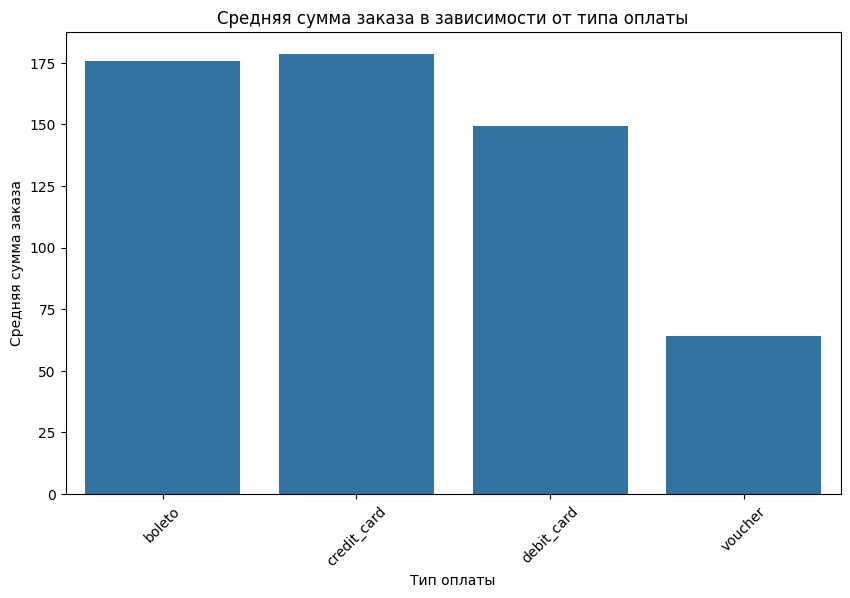

  payment_type  payment_value
0       boleto     175.774904
1  credit_card     178.609835
2   debit_card     149.445684
3      voucher      64.277077


In [ ]:
#средняя сумма заказа в зависимости от типа оплаты
payment_type_avg = data.groupby('payment_type')['payment_value'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='payment_value', data=payment_type_avg)
plt.title('Средняя сумма заказа в зависимости от типа оплаты')
plt.xlabel('Тип оплаты')
plt.ylabel('Средняя сумма заказа')
plt.xticks(rotation=45)
plt.show()

print(payment_type_avg)

In [ ]:
#корреляция между длиной описания товара и количеством заказов
orders_per_product = data.groupby("product_id")["order_id"].count()
description_length = data.groupby("product_id")["product_description_lenght"].mean()

correlation = orders_per_product.corr(description_length)

print("Корреляция между длиной описания товара и количеством заказов:", correlation)

Корреляция между длиной описания товара и количеством заказов: 0.006674201252965961


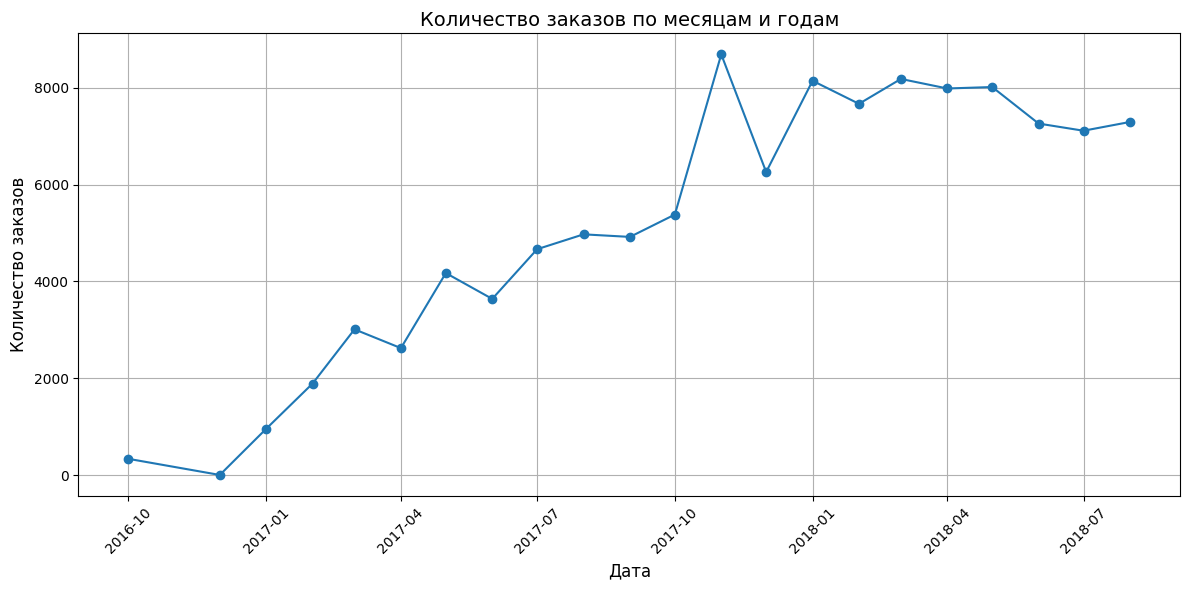

In [ ]:
#заказы на временном промежутке
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['year'] = data['order_purchase_timestamp'].dt.year
data['month'] = data['order_purchase_timestamp'].dt.month

orders_by_month = data.groupby(['year', 'month'])['order_id'].count().reset_index()
orders_by_month['date'] = pd.to_datetime(orders_by_month[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
plt.plot(orders_by_month['date'], orders_by_month['order_id'], marker='o')
plt.title('Количество заказов по месяцам и годам', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

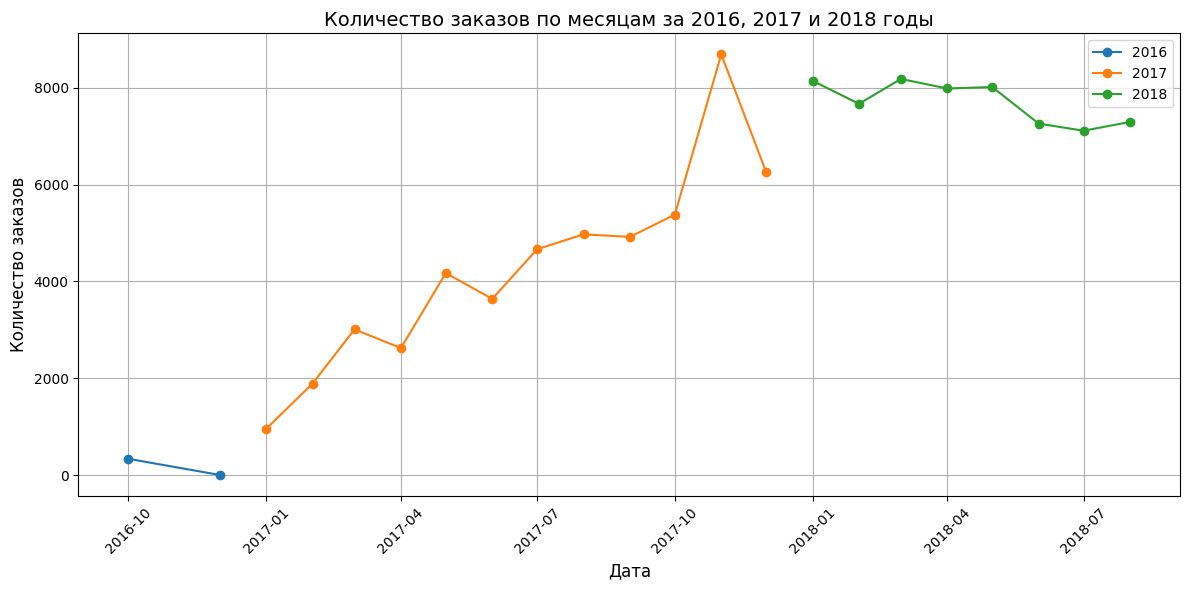

In [ ]:
#количество заказов по месяцам за 2016, 2017 и 2018 годы'
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['year'] = data['order_purchase_timestamp'].dt.year
data['month'] = data['order_purchase_timestamp'].dt.month

data_2016 = data[data['year'] == 2016]
data_2017 = data[data['year'] == 2017]
data_2018 = data[data['year'] == 2018]

orders_2016 = data_2016.groupby(['year', 'month'])['order_id'].count().reset_index()
orders_2016['date'] = pd.to_datetime(orders_2016[['year', 'month']].assign(day=1))

orders_2017 = data_2017.groupby(['year', 'month'])['order_id'].count().reset_index()
orders_2017['date'] = pd.to_datetime(orders_2017[['year', 'month']].assign(day=1))

orders_2018 = data_2018.groupby(['year', 'month'])['order_id'].count().reset_index()
orders_2018['date'] = pd.to_datetime(orders_2018[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
plt.plot(orders_2016['date'], orders_2016['order_id'], marker='o', label='2016')
plt.plot(orders_2017['date'], orders_2017['order_id'], marker='o', label='2017')
plt.plot(orders_2018['date'], orders_2018['order_id'], marker='o', label='2018')

plt.title('Количество заказов по месяцам за 2016, 2017 и 2018 годы', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

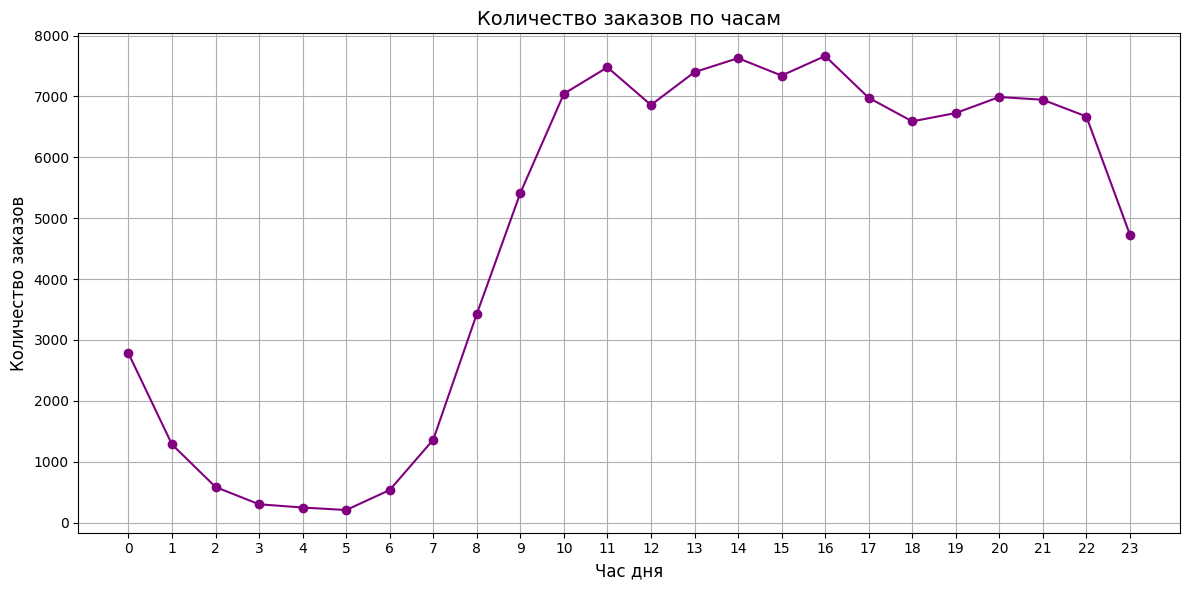

In [ ]:
#распределение заказов по часам
data['hour'] = data['order_purchase_timestamp'].dt.hour
data['day_of_week'] = data['order_purchase_timestamp'].dt.dayofweek

orders_by_hour = data.groupby('hour')['order_id'].count().reset_index()
orders_by_day_of_week = data.groupby('day_of_week')['order_id'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(orders_by_hour['hour'], orders_by_hour['order_id'], marker='o', color='purple')
plt.title('Количество заказов по часам', fontsize=14)
plt.xlabel('Час дня', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

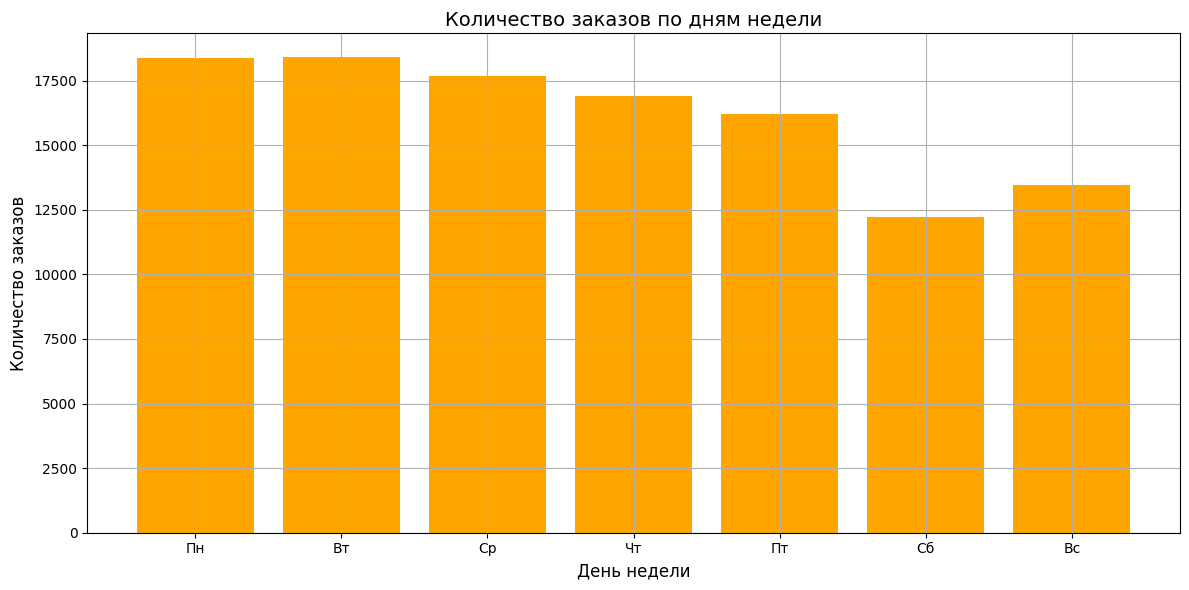

In [ ]:
#распределение заказов по дням недели
plt.figure(figsize=(12, 6))
plt.bar(orders_by_day_of_week['day_of_week'], orders_by_day_of_week['order_id'], color='orange')
plt.title('Количество заказов по дням недели', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(range(7), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(True)
plt.tight_layout()
plt.show()

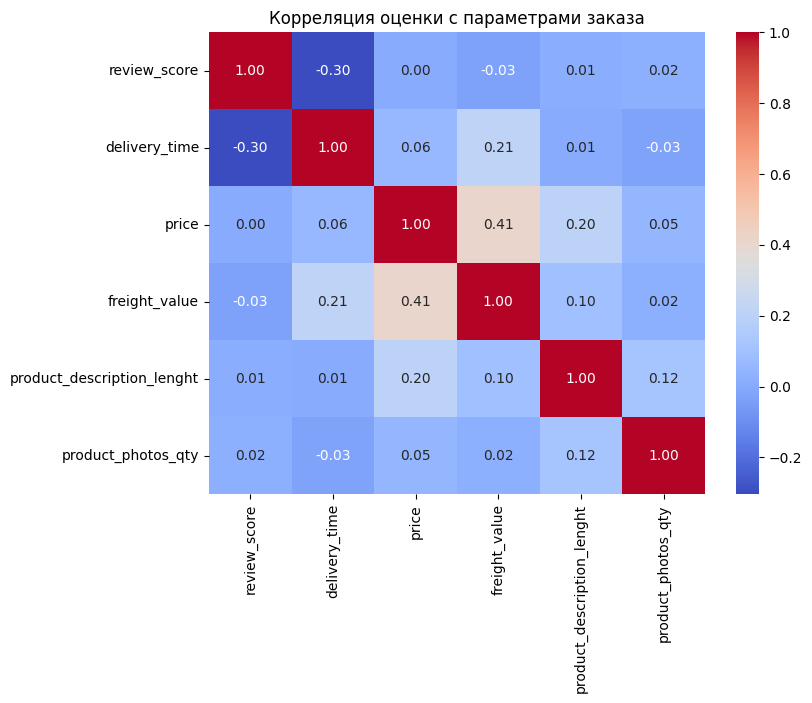

In [ ]:
#корреляция оценки с параметрами заказа
data["delivery_time"] = (pd.to_datetime(data["order_delivered_customer_date"]) - pd.to_datetime(data["order_purchase_timestamp"])).dt.days

correlations = data[["review_score", "delivery_time", "price", "freight_value", "product_description_lenght", "product_photos_qty"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция оценки с параметрами заказа")
plt.show()

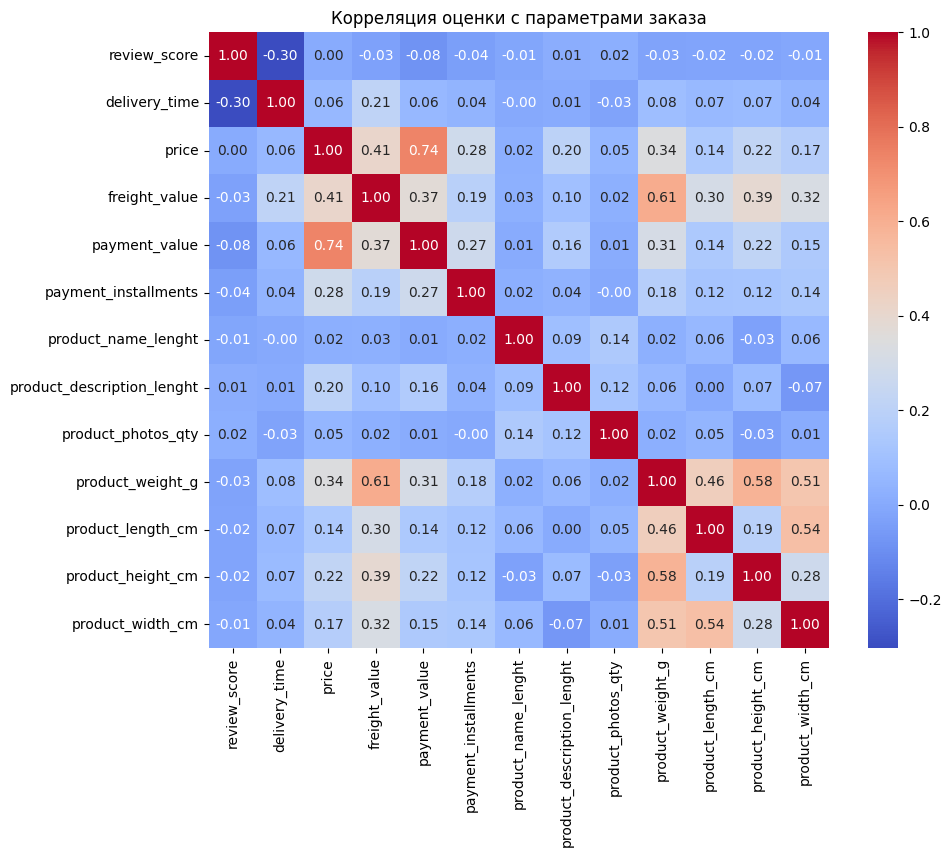

Корреляция оценки с параметрами заказа:
 product_photos_qty            0.021172
product_description_lenght    0.014162
price                         0.003203
product_width_cm             -0.011835
product_name_lenght          -0.013737
product_length_cm            -0.020080
product_height_cm            -0.023240
product_weight_g             -0.026894
freight_value                -0.033637
payment_installments         -0.043283
payment_value                -0.081312
delivery_time                -0.303545
Name: review_score, dtype: float64


In [ ]:
#корреляция оценки с параметрами заказа
data["delivery_time"] = (pd.to_datetime(data["order_delivered_customer_date"]) - pd.to_datetime(data["order_purchase_timestamp"])).dt.days

features = [
    "review_score",
    "delivery_time",
    "price",
    "freight_value",
    "payment_value",
    "payment_installments",
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]

correlations = data[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция оценки с параметрами заказа")
plt.show()

review_correlations = correlations["review_score"].drop("review_score").sort_values(ascending=False)
print("Корреляция оценки с параметрами заказа:\n", review_correlations)

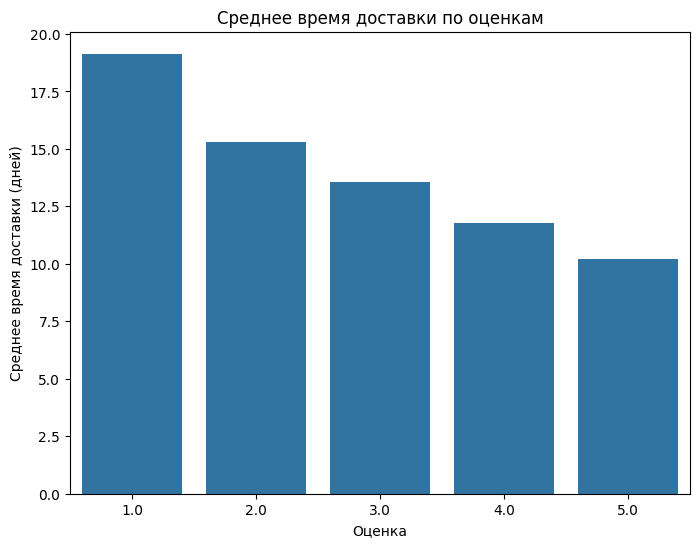

Среднее время доставки по оценкам:
review_score
1.0    19.14
2.0    15.30
3.0    13.57
4.0    11.78
5.0    10.20
Name: delivery_time, dtype: float64


In [ ]:
#оценка в зависимости от среднего времени доставки
#расчет времени доставки
data["delivery_time"] = (pd.to_datetime(data["order_delivered_customer_date"]) - pd.to_datetime(data["order_purchase_timestamp"])).dt.days

#среднее время доставки по оценке
delivery_time_by_score = data.groupby("review_score")["delivery_time"].mean().round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x=delivery_time_by_score.index, y=delivery_time_by_score.values)
plt.title("Среднее время доставки по оценкам")
plt.xlabel("Оценка")
plt.ylabel("Среднее время доставки (дней)")
plt.show()

print("Среднее время доставки по оценкам:")
print(delivery_time_by_score)

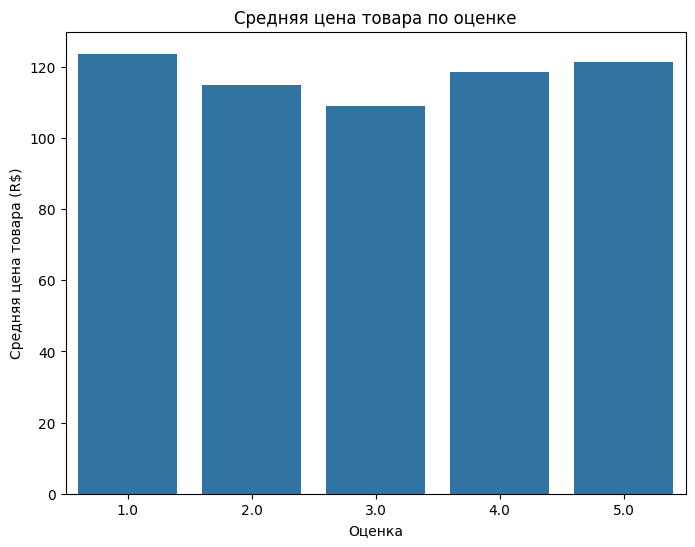

Средняя цена товара по оценкам:
review_score
1.0    123.72
2.0    115.01
3.0    109.06
4.0    118.63
5.0    121.35
Name: price, dtype: float64


In [ ]:
#средняя цена товара по категориям оценок
price_by_score = data.groupby("review_score")["price"].mean().round(2)

plt.figure(figsize=(8, 6))
sns.barplot(x=price_by_score.index, y=price_by_score.values)
plt.title("Средняя цена товара по оценке")
plt.xlabel("Оценка")
plt.ylabel("Средняя цена товара (R$)")
plt.show()

print("Средняя цена товара по оценкам:")
print(price_by_score)

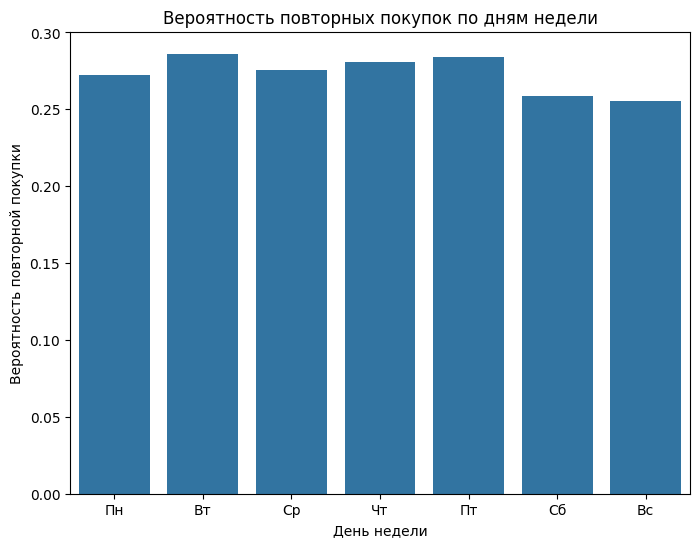

In [ ]:
#вероятность повторных покупок по дням недели
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['day_of_week'] = data['order_purchase_timestamp'].dt.dayofweek

repeat_customers = data.groupby('customer_id')['order_id'].count()
data['repeat_purchase'] = data['customer_id'].map(repeat_customers > 1)

repeat_purchase_by_day = data.groupby('day_of_week')['repeat_purchase'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=repeat_purchase_by_day.index, y=repeat_purchase_by_day.values)
plt.title("Вероятность повторных покупок по дням недели")
plt.xlabel("День недели")
plt.ylabel("Вероятность повторной покупки")
plt.xticks(ticks=range(7), labels=["Пн", "Вт", "Ср", "Чт", "Пт", "Сб", "Вс"])
plt.show()

In [ ]:
#eсть ли разница во времени доставки между новыми и постоянными клиентами?
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"])
data["delivery_time"] = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"]).dt.days
data["is_repeat_customer"] = data.groupby("customer_id")["order_id"].transform("count") > 1
average_delivery_time = data.groupby("is_repeat_customer")["delivery_time"].mean()
print(average_delivery_time)

is_repeat_customer
False    12.114187
True     11.612573
Name: delivery_time, dtype: float64


price_category
Cheap        0.325473
Expensive    0.223915
Name: is_repeat_customer, dtype: float64


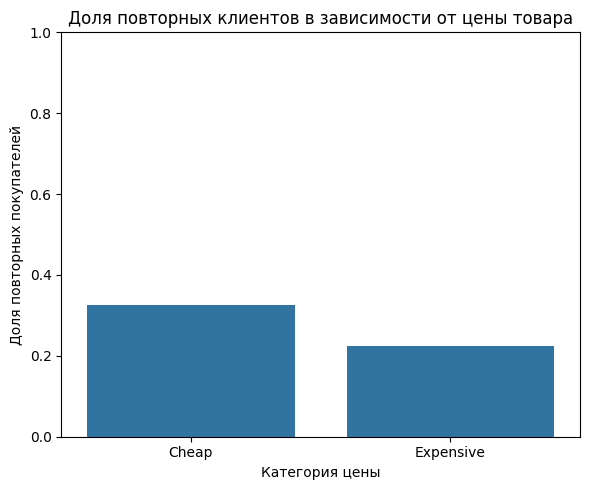

In [ ]:
#доля повторных клиентов в каждой ценовой категории (по медиане)
price_threshold = data['price'].median()
data['price_category'] = data['price'].apply(lambda x: 'Cheap' if x < price_threshold else 'Expensive')

repeat_purchase_by_price = data.groupby('price_category')['is_repeat_customer'].mean()

print(repeat_purchase_by_price)

plt.figure(figsize=(6, 5))
sns.barplot(
    x=repeat_purchase_by_price.index,
    y=repeat_purchase_by_price.values
)
plt.title("Доля повторных клиентов в зависимости от цены товара")
plt.xlabel("Категория цены")
plt.ylabel("Доля повторных покупателей")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

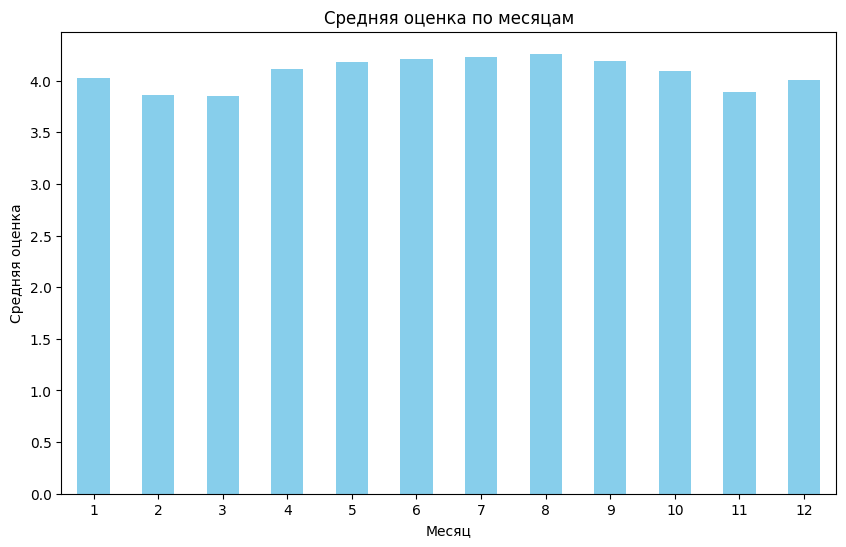

In [ ]:
#средняя оценка по месяцам
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['month'] = data['order_purchase_timestamp'].dt.month

average_scores_by_month = data.groupby('month')['review_score'].mean()

plt.figure(figsize=(10, 6))
average_scores_by_month.plot(kind='bar', color='skyblue')
plt.title('Средняя оценка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=0)
plt.show()

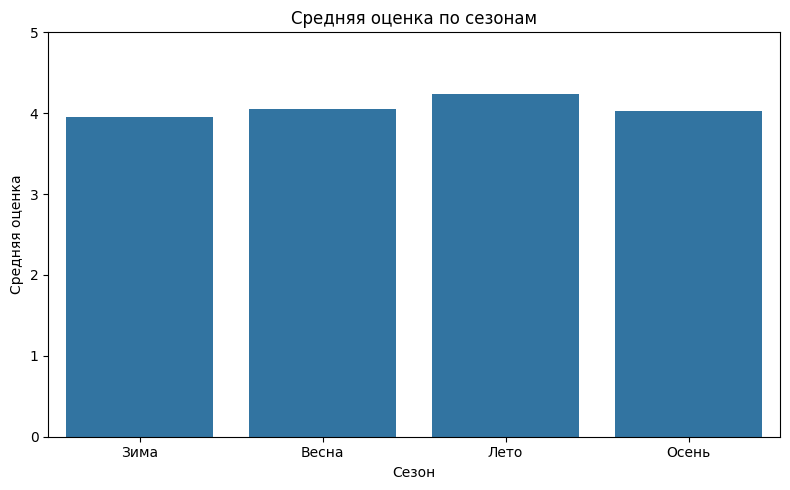

Средняя оценка по сезонам:
season
Зима     3.96
Весна    4.05
Лето     4.23
Осень    4.03
Name: review_score, dtype: float64


In [ ]:
#средняя оценка по сезонам
def get_season(month):
    if month in [12, 1, 2]:
        return 'Зима'
    elif month in [3, 4, 5]:
        return 'Весна'
    elif month in [6, 7, 8]:
        return 'Лето'
    else:
        return 'Осень'

data['season'] = data['month'].apply(get_season)

average_scores_by_season = data.groupby('season')['review_score'].mean().reindex(['Зима', 'Весна', 'Лето', 'Осень'])

plt.figure(figsize=(8, 5))
sns.barplot(x=average_scores_by_season.index, y=average_scores_by_season.values)
plt.title('Средняя оценка по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Средняя оценка')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

print("Средняя оценка по сезонам:")
print(average_scores_by_season.round(2))

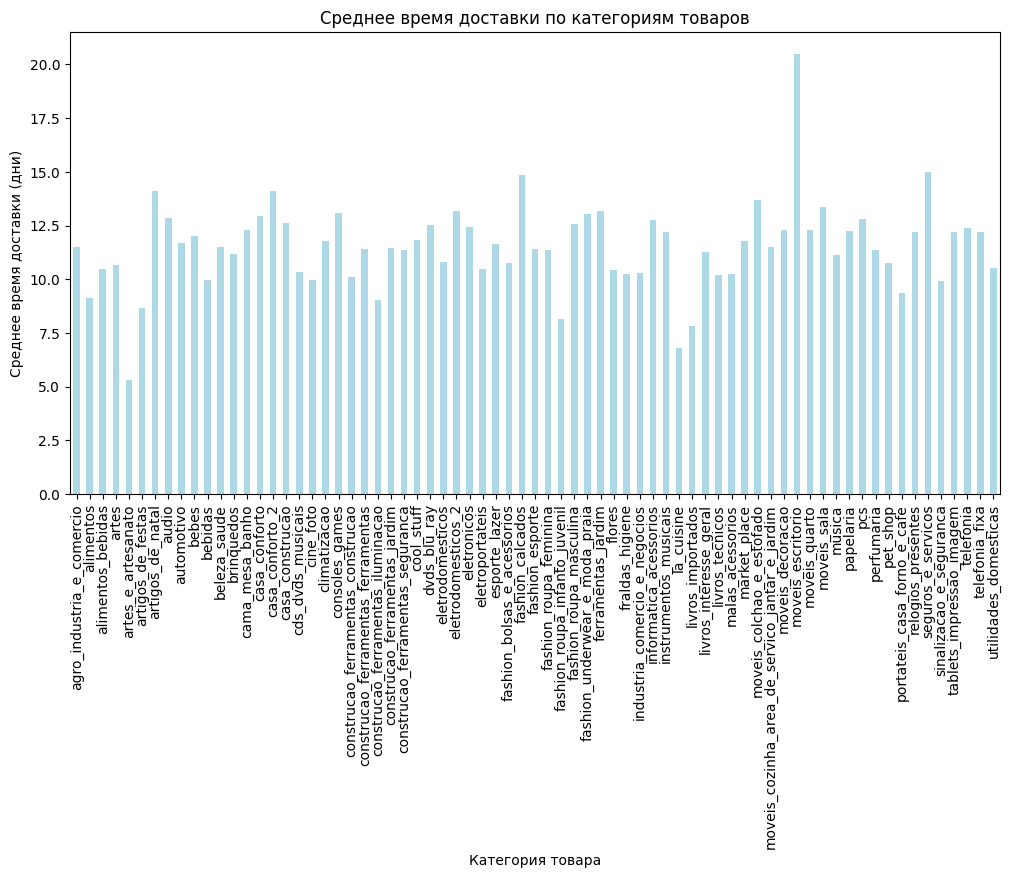

In [ ]:
#cреднее время доставки по категориям товаров
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])

data['delivery_time'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

average_delivery_time_by_category = data.groupby('product_category_name')['delivery_time'].mean()

plt.figure(figsize=(12, 6))
average_delivery_time_by_category.plot(kind='bar', color='lightblue')
plt.title('Среднее время доставки по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Среднее время доставки (дни)')
plt.xticks(rotation=90)
plt.show()

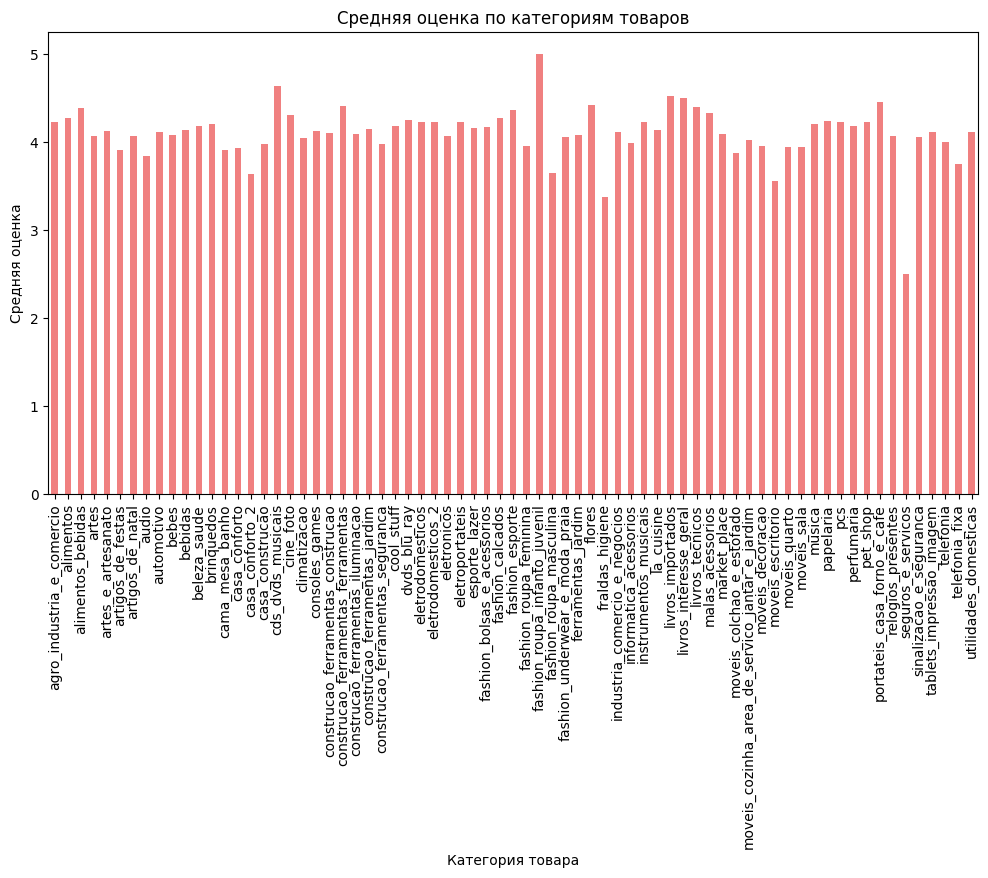

In [ ]:
#средняя оценка по категориям товаров
average_score_by_category = data.groupby('product_category_name')['review_score'].mean()

plt.figure(figsize=(12, 6))
average_score_by_category.plot(kind='bar', color='lightcoral')
plt.title('Средняя оценка по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=90)
plt.show()

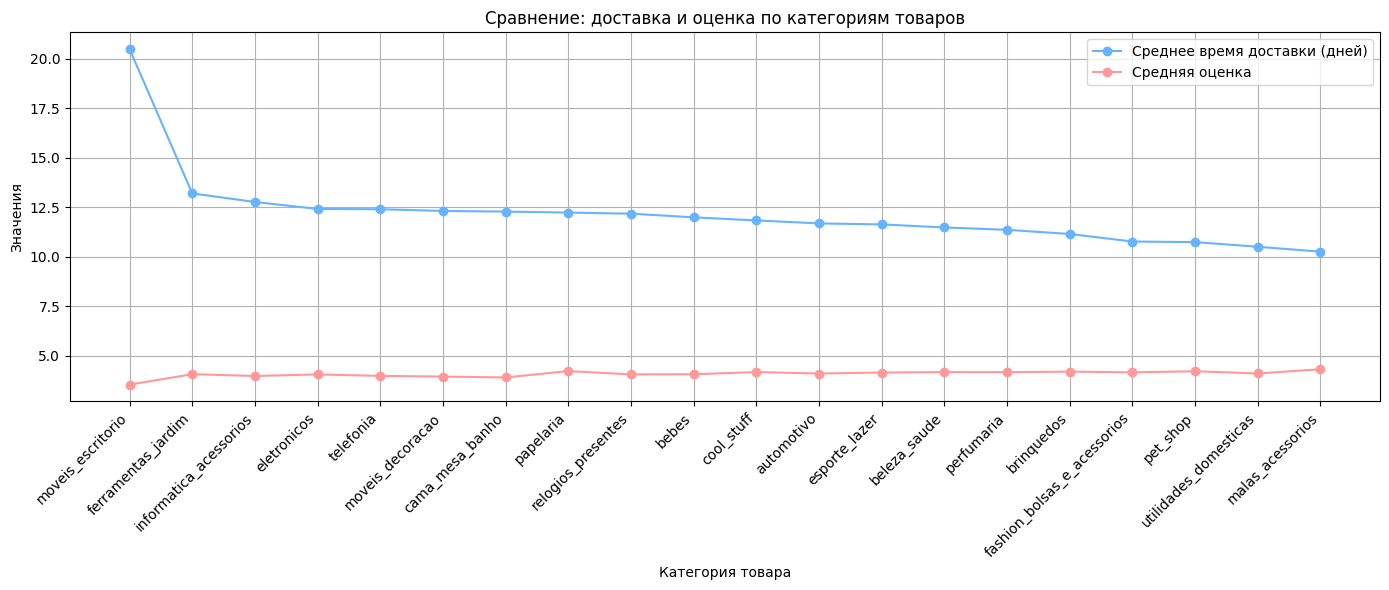

In [ ]:
#сравнение времени доставки и оценке за товар
merged = pd.merge(
    average_delivery_time_by_category,
    average_score_by_category,
    left_index=True,
    right_index=True
).dropna()

merged.columns = ['delivery_time', 'review_score']

top_categories = data['product_category_name'].value_counts().head(20).index
merged_top = merged.loc[merged.index.isin(top_categories)]

merged_top = merged_top.sort_values('delivery_time', ascending=False)

plt.figure(figsize=(14, 6))
plt.plot(merged_top.index, merged_top['delivery_time'], label='Среднее время доставки (дней)', marker='o', color='#66b3ff')
plt.plot(merged_top.index, merged_top['review_score'], label='Средняя оценка', marker='o', color='#ff9999')
plt.title('Сравнение: доставка и оценка по категориям товаров')
plt.xlabel('Категория товара')
plt.ylabel('Значения')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#в каких штатах продавцы получают самые высокие оценки
region_avg_rating = data.groupby('seller_state')['review_score'].mean()

print(region_avg_rating)

seller_state
AM    2.333333
BA    4.153166
CE    4.282828
DF    4.088043
ES    4.040984
GO    4.314991
MA    4.010000
MG    4.160127
MS    4.559322
MT    4.198630
PA    4.500000
PB    3.948718
PE    4.135076
PI    4.363636
PR    4.134780
RJ    4.171793
RN    4.267857
RO    3.857143
RS    4.238724
SC    4.137449
SE    3.900000
SP    4.053278
Name: review_score, dtype: float64


In [ ]:
#средние оценки продавцов, отсортированные по популярности штата

order_counts_by_state = data['seller_state'].value_counts()
region_avg_rating = data.groupby('seller_state')['review_score'].mean()
sorted_region_avg_rating = region_avg_rating[order_counts_by_state.index]

print(sorted_region_avg_rating)

seller_state
SP    4.053278
MG    4.160127
PR    4.134780
RJ    4.171793
SC    4.137449
RS    4.238724
DF    4.088043
BA    4.153166
GO    4.314991
PE    4.135076
MA    4.010000
ES    4.040984
MT    4.198630
CE    4.282828
MS    4.559322
RN    4.267857
PB    3.948718
RO    3.857143
PI    4.363636
SE    3.900000
PA    4.500000
AM    2.333333
Name: review_score, dtype: float64


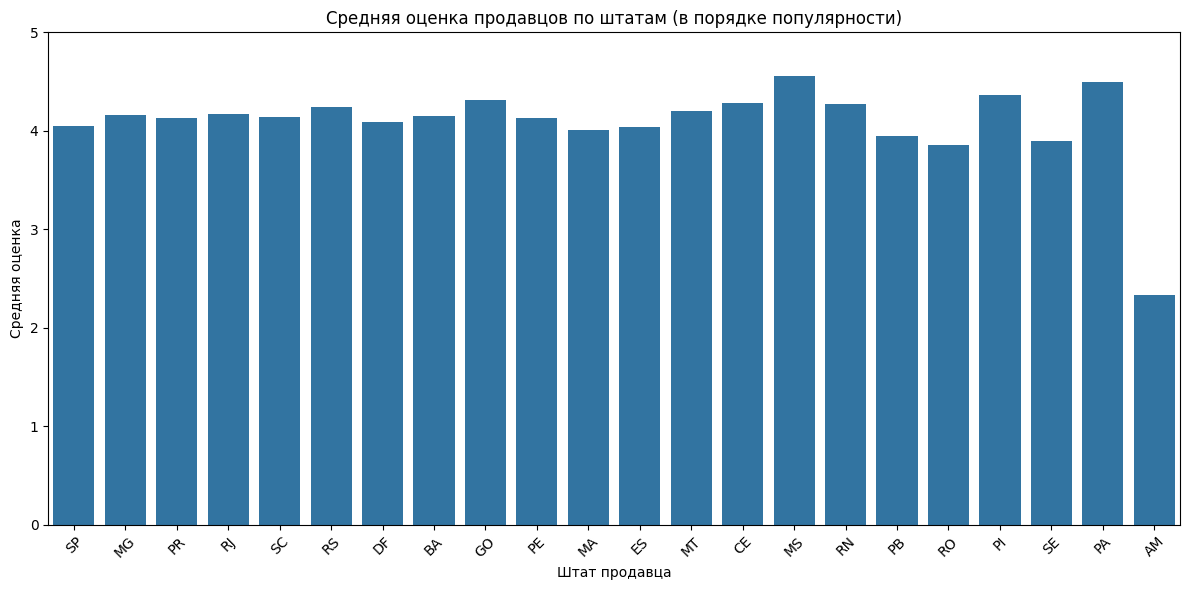

In [ ]:
#средние оценки продавцов, отсортированные по популярности штата

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_region_avg_rating.index, y=sorted_region_avg_rating.values)
plt.title("Средняя оценка продавцов по штатам (в порядке популярности)")
plt.xlabel("Штат продавца")
plt.ylabel("Средняя оценка")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#корреляция между количеством товаров в заказе и средней оценкой
product_count_by_order = data.groupby('order_id')['product_id'].count()
rating_by_order = data.groupby('order_id')['review_score'].mean()

merged_data = pd.DataFrame({
    'product_count': product_count_by_order,
    'average_rating': rating_by_order
}).reset_index()

correlation = merged_data['product_count'].corr(merged_data['average_rating'])

print(f"Корреляция между количеством товаров в заказе и средней оценкой: {correlation}")

Корреляция между количеством товаров в заказе и средней оценкой: -0.09393990155823247


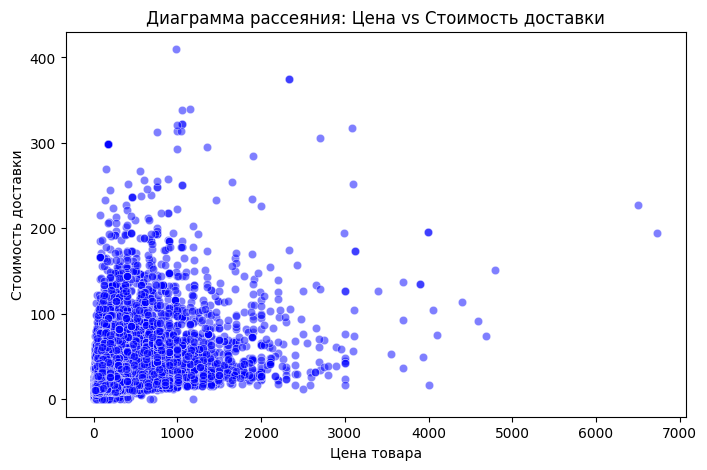

In [ ]:
#сравнение цены и стоимости доставки
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['price'], y=data['freight_value'], alpha=0.5, color='blue')

plt.title('Диаграмма рассеяния: Цена vs Стоимость доставки')
plt.xlabel('Цена товара')
plt.ylabel('Стоимость доставки')
plt.show()

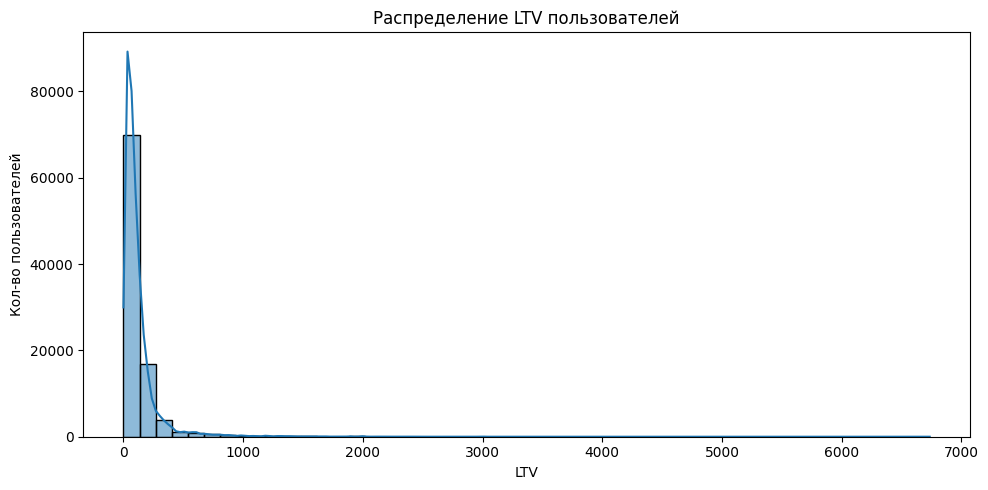

In [ ]:
#расчёт LTV (кол-во заказов * средняя цена)
ltv_data = data.groupby("customer_id").agg({
    "order_id": "nunique",
    "price": "mean"
}).rename(columns={"order_id": "num_orders", "price": "avg_price"})

ltv_data["ltv"] = ltv_data["num_orders"] * ltv_data["avg_price"]

plt.figure(figsize=(10, 5))
sns.histplot(ltv_data["ltv"], bins=50, kde=True)
plt.title("Распределение LTV пользователей")
plt.xlabel("LTV")
plt.ylabel("Кол-во пользователей")
plt.tight_layout()
plt.show()